# Homework 3

## Section 1

In [3]:
# 1.1. Link: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
# 1.2. Description: This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
# 1.3. Fields/Attributes/Predictors: 
# 1.4. Import Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
# 1.5. Load dataset into a Pandas dataframe
data = pd.read_csv('CreditCard.csv')

In [4]:
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
data.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  

## Section 2

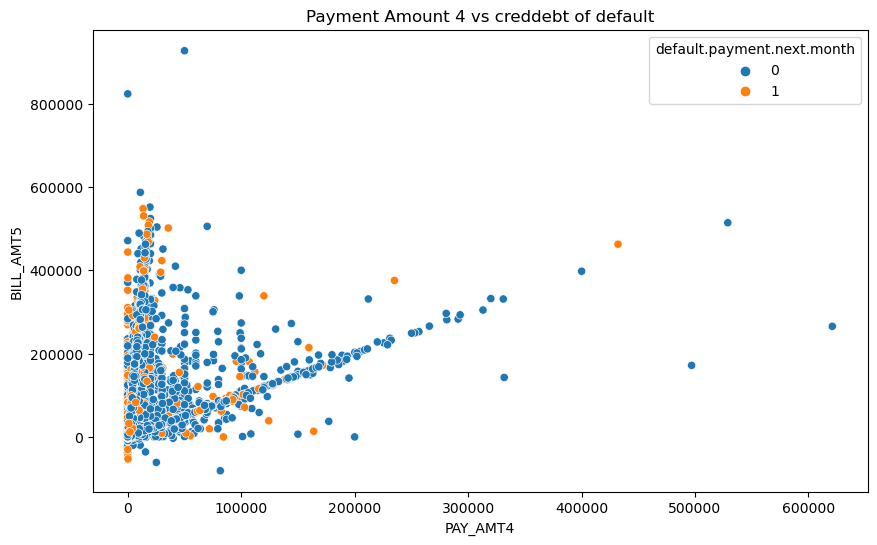

In [7]:

data = data.dropna(subset=['default.payment.next.month']) 
X = data.loc[:, data.columns != "default.payment.next.month"] 

X = sm.add_constant(X)
y = data['default.payment.next.month']

plt.figure(figsize=(10,6))
sns.scatterplot(x='PAY_AMT4', y='BILL_AMT5', hue='default.payment.next.month', data=data)
plt.title('Payment Amount 4 vs creddebt of default')
plt.show()

In [8]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.464610
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29975
Method:                                   MLE   Df Model:                           24
Date:                        Mon, 08 Apr 2024   Pseudo R-squ.:                  0.1208
Time:                                19:32:48   Log-Likelihood:                -13938.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6675      0.121     -5.510      0.000      -0.905      -0.430
ID         -1.338e-06   1.75e-06     -0.765      0.444   -4.77e-06    2.09e-06
LIMIT_BAL  -7.615e-07   1.57e-07     -4.853      0.000   -1.07e-06   -4.54e-07
SEX           -0.1083      0.031     -3.530      0.000      -0.168      -0.048
EDUCATION     -0.1010      0.021     -4.815      0.000      -0.142      -0.060
MARRIAGE      -0.1548      0.032     -4.883      0.000      -0.217      -0.093
AGE            0.0074      0.002      4.170      0.000       0.004       0.011
PAY_0          0.5771      0.018     32.611      0.000       0.542       0.612
PAY_2          0.0832      0.020      4.119      0.000       0.044       0.123
PAY_3          0.0717      0.023      3.172      0.002       0.027       0.116
PAY_4          0.0248      0.025      0.990      0.322      -0.024       0.074
PAY_5          0.0334      0.027      1.240      0.215      -0.019       0.086
PAY_6          0.0080      0.022      0.361      0.718      -0.035       0.051
BILL_AMT1  -5.494e-06   1.14e-06     -4.836      0.000   -7.72e-06   -3.27e-06
BILL_AMT2   2.337e-06   1.51e-06      1.552      0.121   -6.14e-07    5.29e-06
BILL_AMT3   1.365e-06   1.32e-06      1.032      0.302   -1.23e-06    3.96e-06
BILL_AMT4  -8.861e-08   1.35e-06     -0.066      0.948   -2.74e-06    2.56e-06
BILL_AMT5   5.382e-07   1.52e-06      0.354      0.724   -2.45e-06    3.52e-06
BILL_AMT6    4.01e-07    1.2e-06      0.335      0.737   -1.94e-06    2.74e-06
PAY_AMT1   -1.363e-05   2.31e-06     -5.912      0.000   -1.82e-05   -9.11e-06
PAY_AMT2   -9.633e-06   2.09e-06     -4.599      0.000   -1.37e-05   -5.53e-06
PAY_AMT3   -2.723e-06   1.72e-06     -1.582      0.114    -6.1e-06     6.5e-07
PAY_AMT4   -3.967e-06   1.79e-06     -2.222      0.026   -7.47e-06   -4.68e-07
PAY_AMT5   -3.333e-06   1.78e-06     -1.874      0.061   -6.82e-06    1.52e-07
PAY_AMT6   -2.065e-06    1.3e-06     -1.593      0.111    -4.6e-06    4.75e-07
==============================================================================
"""

In [9]:
y_filtered = y[(data['AGE'] > 50) & (data['AGE'] < 60)]
y_filtered
data.iloc[[263]]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
263,264,230000.0,2,1,2,37,-2,-2,-2,-2,...,0.0,299.0,338.0,51315.0,0.0,0.0,299.0,338.0,0.0,0


In [10]:
test = X.iloc[[263]].copy()
test['AGE'] = 30
test['PAY_AMT4'] = 60
prediction = model.predict(test)
percentage_probability = prediction.iloc[0] * 100
binary_predictions = (prediction >= 0.5).astype(int)
class_prediction = binary_predictions.iloc[0]
print(f"Probability of default: {percentage_probability:.2f}%")
print(f"Class: {class_prediction}")
test

Probability of default: 3.11%
Class: 0


,const,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
263,1.0,264,230000.0,2,1,2,30,-2,-2,-2,...,0.0,0.0,299.0,338.0,51315.0,0.0,0.0,60,338.0,0.0


## Section 3

In [12]:
data['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [13]:
data['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

[0.1705034  0.10793117 0.08531915 0.07225079 0.06252642 0.05414688
 0.04740792 0.0426161  0.04091997 0.03668066 0.03298661 0.03198501
 0.02757561 0.02217313 0.02101852 0.02011324 0.01985403 0.01896578
 0.01745963 0.01638394 0.01520728 0.01399633 0.01314981 0.00882861]


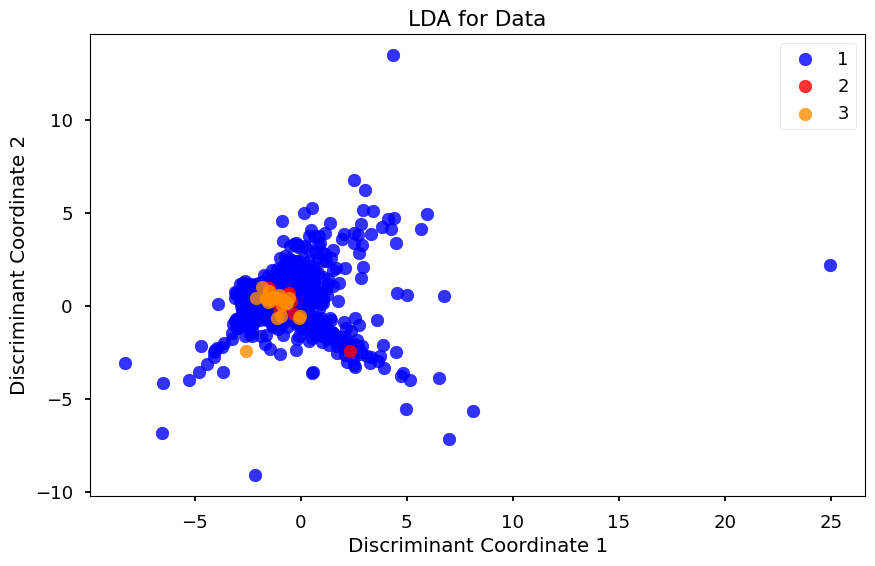

In [14]:
X = data.loc[:, data.columns != "PAY_AMT4"]  # Select all columns except "AGE"
X = sm.add_constant(X)  # Add a constant column for the intercept
y = data['PAY_AMT4']  # Target variable

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

print(lda.explained_variance_ratio_)

X_r_lda = lda.transform(X)

target_names = ['1', '2', '3']
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=[10, 6])
    colors = ['blue', 'red', 'darkorange']

    # Plot the LDA results
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        ax.scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=0.8, label=target_name, color=color)
    
    ax.set_title('LDA for Data')
    ax.set_xlabel('Discriminant Coordinate 1')
    ax.set_ylabel('Discriminant Coordinate 2')
    ax.legend(loc='best')

plt.show()

## Section 4

In [16]:
data = data.dropna(subset=['AGE']) 
X = data.loc[:, data.columns != 'AGE'] 
X = sm.add_constant(X) 
y = data['AGE']

lr = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"MSE for fold {len(mse_scores)}: {mse:.4f}")

print(f"Mean MSE from 5-fold CV using Linear Regression: {np.mean(mse_scores):.4f}")
print(f"Standard deviation of MSE: {np.std(mse_scores):.4f}")


MSE for fold 1: 66.0032
MSE for fold 2: 68.0571
MSE for fold 3: 67.4591
MSE for fold 4: 65.4976
MSE for fold 5: 66.6622
Mean MSE from 5-fold CV using Linear Regression: 66.7358
Standard deviation of MSE: 0.9321


## Section 5

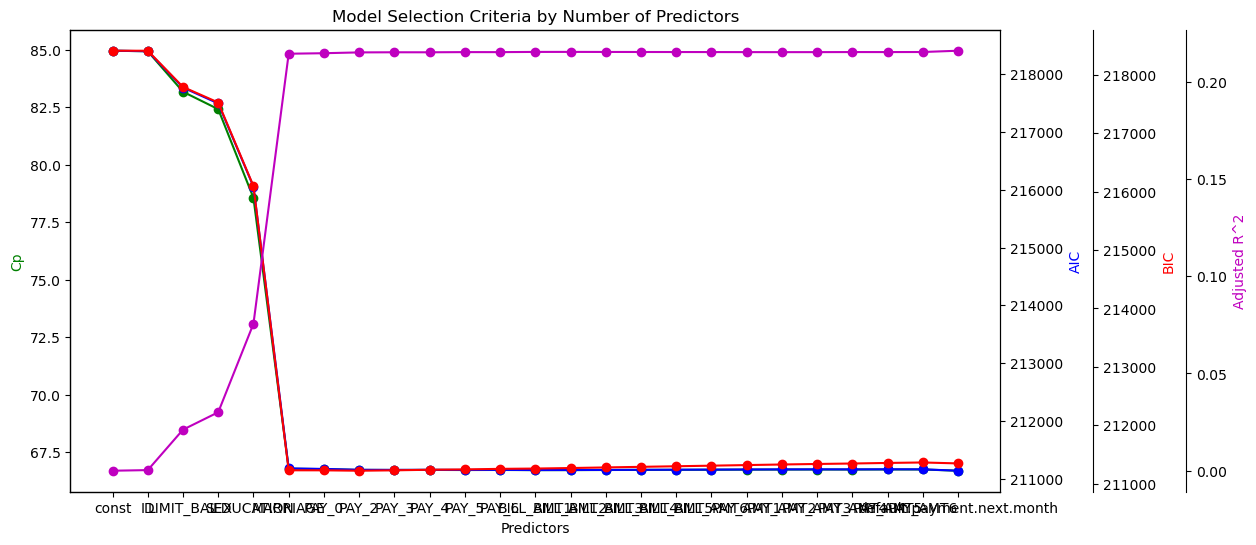

In [18]:
data = data.dropna(subset=['AGE'])
X = data.loc[:, data.columns != "AGE"]
X = sm.add_constant(X)
y = data['AGE']

def compute_cp(model, X, y):
    mse = np.mean((model.predict(X) - y) ** 2)
    p = len(model.params) - 1
    n = len(y)
    return mse + 2 * p * mse / (n - p - 1)

predictors = X.columns
cp_values, aic_values, bic_values, adjr2_values = [], [], [], []

for k in range(1, len(predictors) + 1):
    chosen_predictors = predictors[:k]
    X_subset = X[chosen_predictors]
    X_subset = sm.add_constant(X_subset)
    model = sm.OLS(y, X_subset).fit()
    cp_values.append(compute_cp(model, X_subset, y))
    aic_values.append(model.aic)
    bic_values.append(model.bic)
    adjr2_values.append(model.rsquared_adj)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

ax3.spines['right'].set_position(('axes', 1.1))
ax4.spines['right'].set_position(('axes', 1.2))

ax1.plot(predictors, cp_values, 'g-', label="Cp", marker='o')
ax2.plot(predictors, aic_values, 'b-', label="AIC", marker='o')
ax3.plot(predictors, bic_values, 'r-', label="BIC", marker='o')
ax4.plot(predictors, adjr2_values, 'm-', label="Adj R^2", marker='o')

ax1.set_xlabel('Predictors')
ax1.set_ylabel('Cp', color='g')
ax2.set_ylabel('AIC', color='b')
ax3.set_ylabel('BIC', color='r')
ax4.set_ylabel('Adjusted R^2', color='m')

plt.title('Model Selection Criteria by Number of Predictors')
plt.show()


## Section 6

In [20]:
data = data.dropna(subset=['AGE'])
X = data.loc[:, data.columns != "AGE"]
X = sm.add_constant(X)
y = data['AGE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly10_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly10_model.fit(X_train, y_train)
y_pred_poly10 = poly10_model.predict(X_test)
mse_poly10 = mean_squared_error(y_test, y_pred_poly10)

poly4_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly4_model.fit(X_train, y_train)
y_pred_poly4 = poly4_model.predict(X_test)
mse_poly4 = mean_squared_error(y_test, y_pred_poly4)

poly3_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly3_model.fit(X_train, y_train)
y_pred_poly3 = poly3_model.predict(X_test)
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)

print(f"Mean Squared Error for 10th-degree Polynomial: {mse_poly10:.2f}")
print(f"Mean Squared Error for 4th-degree Polynomial: {mse_poly4:.2f}")
print(f"Mean Squared Error for 3rd-degree Polynomial: {mse_poly3:.2f}")


Mean Squared Error for 10th-degree Polynomial: 542.78
Mean Squared Error for 4th-degree Polynomial: 542.78
Mean Squared Error for 3rd-degree Polynomial: 542.78
